# Investigating 'TMDb movie data' 

# How highest grossing movies are related to highest user rated movies in terms of:
### 1. Genres
### 2. Keywords
### 3. Release Date
### 4. Cast
### 5. Runtime


In [1]:
#importing libaries
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('tmdb-movies.csv')

In [3]:
#adding commas to seprate, columns of dtype='float' by thousands 
pd.set_option('display.float_format','{:,}'.format)

In [4]:
movies.columns

Index([u'id', u'imdb_id', u'popularity', u'budget', u'revenue',
       u'original_title', u'cast', u'homepage', u'director', u'tagline',
       u'keywords', u'overview', u'runtime', u'genres',
       u'production_companies', u'release_date', u'vote_count',
       u'vote_average', u'release_year', u'budget_adj', u'revenue_adj'],
      dtype='object')

According to data, final two columns ending with '_adj' show the budget and revenue of the associated movie in term of 2010 dollars, accounting for inflation over time.

Therefore, for comparing samples.

1. Drop the 'budget' and 'revenue' columns

2. Remove '_adj' from the final two column names to make dataframe easy to investigate.

In [5]:
#removing 'budget' and 'revenue' columns from dataframe
movies.drop(['budget','revenue'], axis = 'columns',inplace = True)

In [6]:
#removing '_adj' from names of last two columns
movies.rename(columns = {'budget_adj': 'budget', 'revenue_adj':'revenue'},inplace = True)

In [7]:
movies.columns

Index([u'id', u'imdb_id', u'popularity', u'original_title', u'cast',
       u'homepage', u'director', u'tagline', u'keywords', u'overview',
       u'runtime', u'genres', u'production_companies', u'release_date',
       u'vote_count', u'vote_average', u'release_year', u'budget', u'revenue'],
      dtype='object')

## Cleaning 'movies' database:
## 1. Check for duplicated rows 

In [8]:
#checking for duplicated rows
movies.duplicated().sum()

1

In [9]:
#removing duplicated row 
movies.drop_duplicates(inplace = True)

## 2. Check for undesired values in:
Defination of Undesired values:

i) missing values

ii) values that are less than or equal to 0

In [10]:
#function to check missing values and less than equal to zero values
def undesired_values(df,field_name):
    null_values = df[field_name].isnull().sum()
    zeros_and_negative = df[df[field_name] <= 0].shape[0]
    
    print field_name + " column contains {} missing values".format(null_values) + \
    " and {} negative or zero values".format(zeros_and_negative)
    

### a) budget column 

In [11]:
undesired_values(movies,'budget')

budget column contains 0 missing values and 5696 negative or zero values


### b) revenue column

In [12]:
undesired_values(movies,'revenue')

revenue column contains 0 missing values and 6016 negative or zero values


Both budget and revenue columns contains undesired values.
To study to dataframe properly, remove all rows containing undesired values from budget and revenue columns.

In [13]:
#selecting movies with budget and revenue greater than 0
movies = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)]
movies.shape

(3854, 19)

### c) vote_average column 

In [14]:
undesired_values(movies,'vote_average')

vote_average column contains 0 missing values and 0 negative or zero values


## Selection criteria of successful movies --> It should be highest grossing and highest user rated(vote_average) movie.

### *Criteria to define highest grossing movie: It should have made profit of atleast 100 million dollars.

### *Criteria to define highest rated movies: It should have 'vote_average' of atleast 7.

In [15]:
profit = movies['revenue'] - (movies['budget'])
successful_movies = movies[(movies['vote_average'] >=7) & (profit >=100000000)]

In [16]:
successful_movies.shape

(279, 19)

## Investigating the different characteristics of SUCCESSFUL MOVIES

### 1st characteristic: GENRES

In [17]:
#check for undesried values
undesired_values(successful_movies,'genres')

genres column contains 0 missing values and 0 negative or zero values


In [18]:
#creating series of successful movies genres
successful_multi_genres = successful_movies.genres

In [19]:
#creating series of multi-genres' frequency
successful_multi_genres = successful_multi_genres.value_counts()

In [20]:
successful_multi_genres.count()

164

#### Since, total number of cross-genres are 164 and they all can't be plot on graph. Therefore studying only top 7 multi-genres. 

In [21]:
successful_multi_genres.head(n=7)

Drama                       23
Drama|Romance                9
Comedy|Drama|Romance         6
Adventure|Fantasy|Family     6
Animation|Family             6
Crime|Drama|Thriller         6
Drama|Crime                  5
Name: genres, dtype: int64

### Conclusion 1-a: 
#### i) Drama is part of most multi-genres
#### ii) Drama-Romance is most popular multi-genre.

### Since movies genres are represented as multi-genres. Therefore,split them into main-genres and study them. 

In [22]:
#function for ungrouping each row in pandas series
def ungroup(df,field_name):
    ungrouped = []
    for _,cell in df[field_name].iteritems():
        #creating list of grouped elements
        group = cell.split('|')
        
        #iterating over each element in each group 
        for item in group:
            ungrouped.append(item)
    return pd.Series(ungrouped)

In [23]:
successful_main_genres = ungroup(successful_movies,'genres')

In [24]:
#creating series for main-genres' frequency
successful_main_genres = pd.Series(successful_main_genres.value_counts())
successful_main_genres.head()

Drama        144
Action        88
Thriller      80
Adventure     79
Comedy        54
dtype: int64

In [25]:
#function for adding index as column and renaming columns of dataframe formed
def form_df(series,column_1,column_2):
    df = series.reset_index()
    df.rename(columns={df.columns[0]:column_1,df.columns[1]:column_2},inplace = True)
    return df
    

In [26]:
successful_main_genres = form_df(successful_main_genres,'genres','total_movies')
successful_main_genres.head()

,genres,total_movies
0,Drama,144
1,Action,88
2,Thriller,80
3,Adventure,79
4,Comedy,54


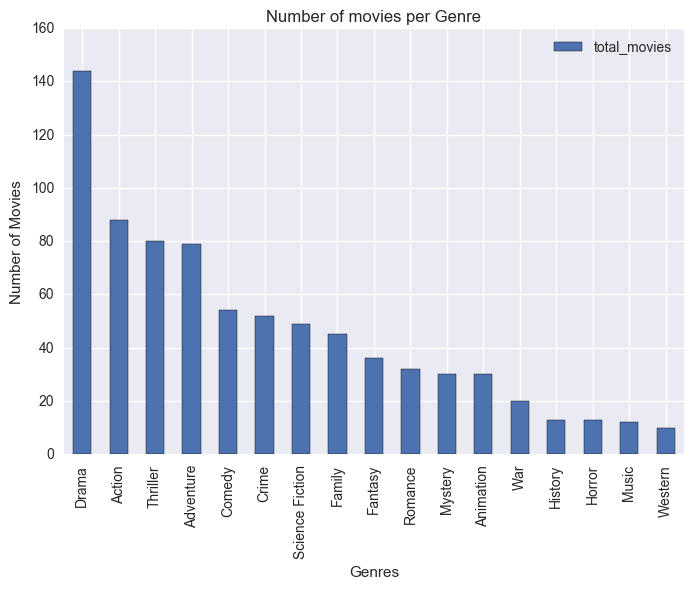

In [27]:
successful_main_genres.plot.bar(x='genres',y='total_movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of movies per Genre')

### Conclusion 1b: In conclusion 1a, we observe that drama was part a part of most multi-genres. And even after spilting multi-genres into main-genres, we can see that drama is also most pouplar main-genre as compared to other main_genres.

## 2nd Characteristic: Keywords

In [28]:
undesired_values(successful_movies,'keywords')

keywords column contains 0 missing values and 0 negative or zero values


In [29]:
#creating series of keywords
successful_keywords = ungroup(successful_movies,'keywords')

In [30]:
print("Total number of keywords {}.".format(successful_keywords.count()))
successful_keywords.value_counts()

Total number of keywords 1362.


based on novel                  23
musical                         12
prison                           9
marvel comic                     9
paris                            8
dystopia                         8
indian                           7
world war ii                     7
corruption                       7
rape                             6
animation                        6
individual                       6
suicide attempt                  6
wife husband relationship        6
future                           5
sequel                           5
chicago                          5
hero                             5
elves                            5
san francisco                    5
cutting the cord                 5
friendship                       5
brother brother relationship     5
middle-earth (tolkien)           5
secret identity                  5
castle                           5
orcs                             5
new york                         5
saving the world    

### Since total number of keywords are 1362. Therefore, studying only most successful keywords.
### *Criteria for selecting most successful keywords --> Keyword should have frequency of atleast 6

In [31]:
common_keywords = successful_keywords.value_counts()[successful_keywords.value_counts() > 5]

In [32]:
#adding index as column
common_keywords = form_df(common_keywords,'keyword','frequency')
common_keywords.head()

,keyword,frequency
0,based on novel,23
1,musical,12
2,prison,9
3,marvel comic,9
4,paris,8


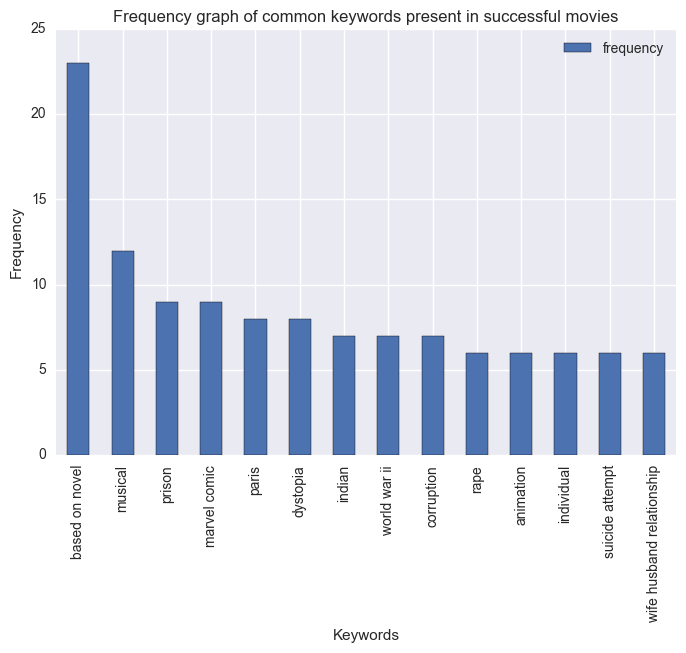

In [33]:
common_keywords.plot.bar(x='keyword',y='frequency')
plt.title('Frequency graph of common keywords present in successful movies')
plt.xlabel('Keywords')
plt.ylabel('Frequency')

### Conclusion 2: "based on novel" is most common keyword among successful movies or in other words we can say, most successful movies were based on some novels.
### Few surprising keywords were 'dystopia', 'rape' and 'suicide attempt' becuase they all show unplesant or bad environment. But still they perform well on box-office and among viewers too.



## 3rd Characteristic: Release date
### Question : Which month has maximum succesful movies.

In [36]:
#changing data type of release year to datetime
successful_movies.loc[:,('release_date')] = pd.to_datetime(successful_movies.release_date)
successful_movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget                         float64
revenue                        float64
dtype: object

In [37]:
successful_movies_month = successful_movies['release_date'].dt.month
successful_movies_month.head()

1     5
3    12
4     4
5    12
7     9
Name: release_date, dtype: int64

### Months are represented by numbers, January=1 to December=12. 
### Therefore repalceing number by their respective month abbreviation.

In [38]:
#replacing numbers by month abbreviation
import calendar
successful_movies_month = successful_movies_month.apply(lambda x: calendar.month_abbr[x])

In [39]:
#creating series, representing the fequency of each month
successful_movies_month = successful_movies_month.value_counts()

In [40]:
#adding index as column and renaming them
successful_movies_month = form_df(successful_movies_month,'month','frequency')
successful_movies_month.head()

,month,frequency
0,Dec,58
1,Jun,36
2,Nov,33
3,May,28
4,Jul,26


#### Months are not ordered properly. Therefore, sorting dataframe, successful_movies_month in chronological order.

In [41]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

successful_movies_month['month'] = successful_movies_month['month'].astype('category',categories = month_order, ordered = True)

In [42]:
successful_movies_month = successful_movies_month.sort_values('month')
successful_movies_month

,month,frequency
11,Jan,3
10,Feb,10
9,Mar,12
8,Apr,12
3,May,28
1,Jun,36
4,Jul,26
7,Aug,18
6,Sep,19
5,Oct,24


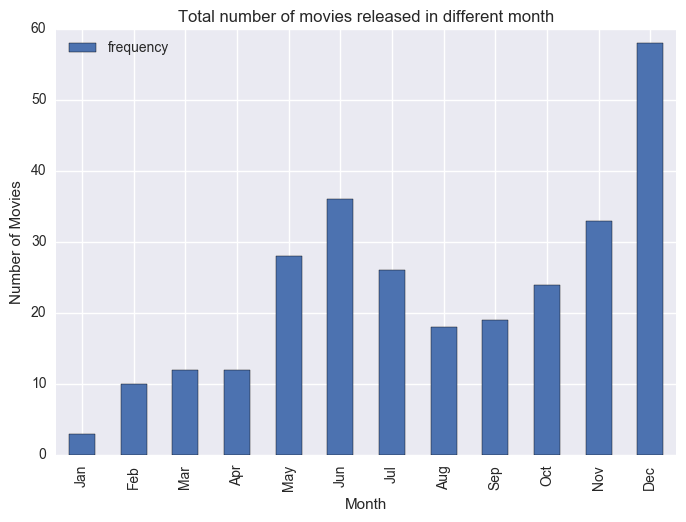

In [43]:
successful_movies_month.plot.bar(x='month',y='frequency')
plt.title('Total number of movies released in different month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

### Conclusion 3: Most successful movies were released in December followed by June. In december, we have christmas hoilydays (atleast children studying in college and schools) and in June, we have summer vaction. So, we can ASSUME (we can only assume beacuse of limitations, explained later) that most successful movies were release on hoildays time.
### 4th characteristic: Cast

In [44]:
undesired_values(successful_movies,'cast')

cast column contains 0 missing values and 0 negative or zero values


In [45]:
#pandas series to successful artist
successful_artist= ungroup(successful_movies,'cast')

In [46]:
#pandas series of common artist in successful movies
common_artist = successful_artist.value_counts()

In [47]:
common_artist.count()

957

### Since total number of artist are 957. Therefore, studying only those artist, who were casted in more than 5 movies

In [48]:
common_artist = common_artist[common_artist > 5]

In [49]:
common_artist

Tom Hanks              13
Leonardo DiCaprio       9
Brad Pitt               9
Samuel L. Jackson       8
Rupert Grint            8
Daniel Radcliffe        8
Emma Watson             8
Matt Damon              8
Dustin Hoffman          7
Harrison Ford           7
Robert De Niro          7
Clint Eastwood          6
Gary Oldman             6
Ian McKellen            6
Al Pacino               6
Anne Hathaway           6
Christopher Plummer     6
dtype: int64

In [50]:
#adding index as column
common_artist = form_df(common_artist,'artist','frequency')

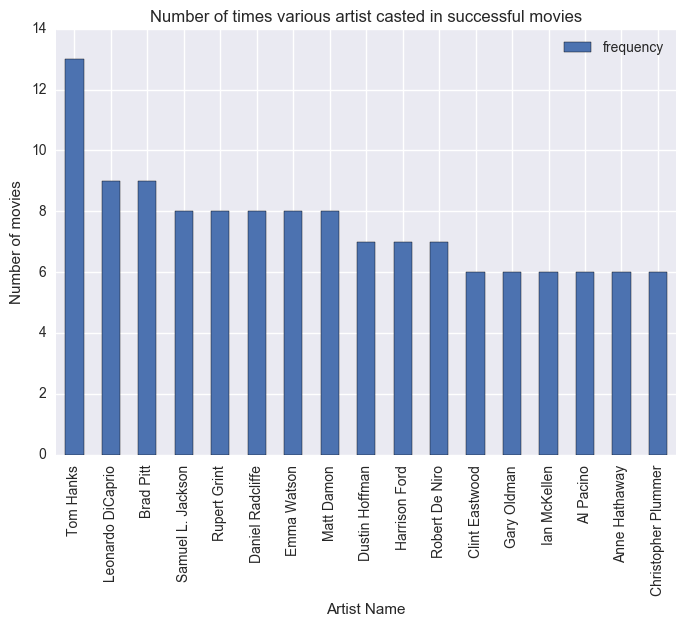

In [51]:
common_artist.plot.bar(x='artist',y='frequency')
plt.title('Number of times various artist casted in successful movies')
plt.xlabel('Artist Name')
plt.ylabel('Number of movies')

### Conclusion 4: Tom Hanks has done most successful movies among all artists. Followed by Leonardo DiCaprio, Brat Pitt and Samuel L. Jackson. 

### Emma watson, Daniel Radcliffe and Rupert Grint were casted in total 8 'successful movies' which implies that all Harry potter movies were 'successful' as all three actors were casted in all harry potter movies.
### 5th characteristic : runtime

In [52]:
undesired_values(successful_movies,'runtime')

runtime column contains 0 missing values and 0 negative or zero values


In [53]:
#creating series of movie runtime
movies_runtime = successful_movies.runtime

count           279.0
mean    126.838709677
std     25.2923725198
min              78.0
25%             108.0
50%             125.0
75%             140.0
max             216.0
Name: runtime, dtype: float64


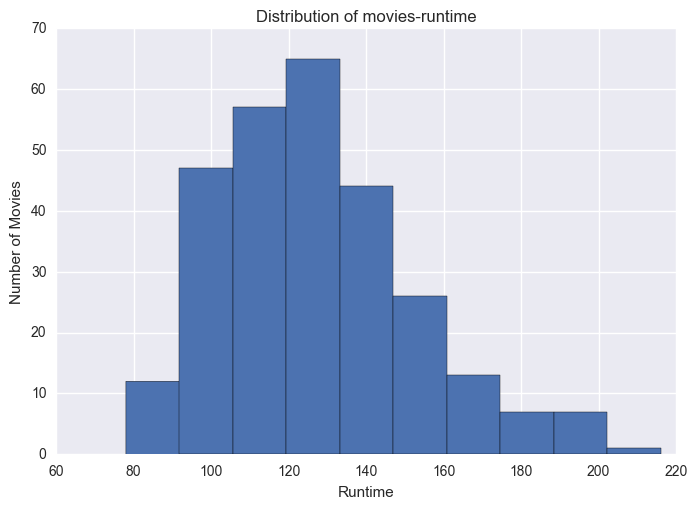

In [54]:
print (movies_runtime.describe())

plt.hist(movies_runtime)
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Distribution of movies-runtime')

### Conclusion 5: Maximum successful movies had runtime between 120 to 135 minutes. And average time of successful movie is 130 minutes

# Limitions And Final Conclusion:
#### *In below dicussion, 'successful movie' means highest grossing and highest user rated movie. 'budget' and 'revenue' refer to data present in 'budget_adj' and 'revenue_adj' columns

## Limitions:
1. For investigation of successful movies, we neeeded to find difference between revenue and budget values. During data cleaning we found that about 5696 budget and 6016 revenue values were either negative or zero. So, we have drop all rows(movies) containing such values, i.e., atleast 6016 movies were removed from database and given that total movies were 10866, we have reduced sample size to its 50%. 
2. We can only estiamtes different features of a popultion, if we have a bigger sample set. Given that, we had already reduced our sample size to its 50%, We can't estimate different features of population. And since we know, correlation does not implies causation. 
#### So,We can only show common characteristic/features that we found in our small smaple set.

## Conclusion:
### During study we found following results regarding different features of successful movies:

1. Genres: Drama was most popular or common among the successful movies, both as main genre and as a part of multi-genre. Drama-Romance was most common cross-genre among successful movies.

2. Keywords: 'based on novel' was common keywords among successful movies. In other words movies that were based on a novel was both successful on box-office and among viewers too. Few surprising keywords were 'dystopia', 'rape' and 'suicide attempt' becuase they all show unplesant or bad environment. But still they perform well on box-office and among viewers too. 

3. Release month: Most successful movies were released in December followed by June. In december, we have christmas hoilydays (atleast children who are in colleges and schools) and in June, we have summer vaction. So, we can ASSUME that most successful movies WERE release during hoilday time.

4. Cast: Tom Hanks has done most successful movies among all artists. Followed by Leonardo DiCaprio, Brat Pitt and Samuel L. Jackson. Emma watson, Daniel Radcliffe and Rupert Grint were casted in total 8 'successful movies' which implies that all Harry potter movies were 'successful'.

5. Movie Runtime: Average runtime of successful movies is 130 minutes. Maximum successful movies have runtime between 120 to 135 minutes.
